In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [10]:
centroids=[(-5,-5),(5,5)]
cluster_std=[1,1]

X,y=make_blobs(n_samples=5000,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

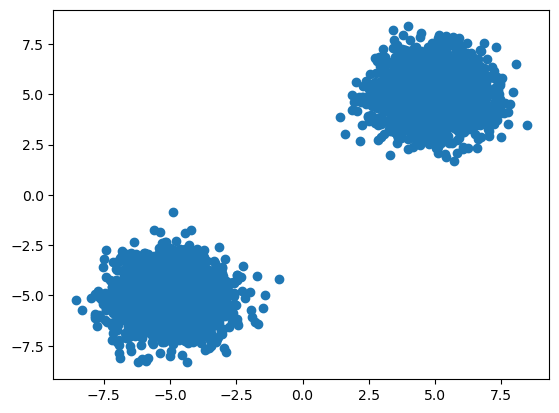

In [11]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [26]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=None
    def fit_predict(self,X):
        import random
        import numpy as np
        random_sample=random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids=X[random_sample]
        for i in range(self.max_iter):
            # Assign Clusters
            cluster_group=self.assign_clusters(X)
            # Move Centroids
            old_centroids=self.centroids
            self.centroids=self.move_centroids(X,cluster_group)             
            # Check and Finish
            if (old_centroids==self.centroids).all:
                break
        return cluster_group
                
    def assign_clusters(self,X):
        centroids=[]
        distances=[]
        cluster_group=[]
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))              
            min_distance=min(distances)
            indexes=distances.index(min_distance)
            cluster_group.append(indexes)
            distances.clear()
        return np.array(cluster_group)
    
                                 
    def move_centroids(self,X,cluster_group):
        new_centroids=[]
        cluster_type=np.unique(cluster_group)
        for type_ in cluster_type:
            new_centroids.append(X[cluster_group==type_].mean(axis=0))
        return np.array(new_centroids)
            
                                 
    
                                 
    

In [27]:
km=KMeans(n_clusters=2)
y_means=km.fit_predict(X)


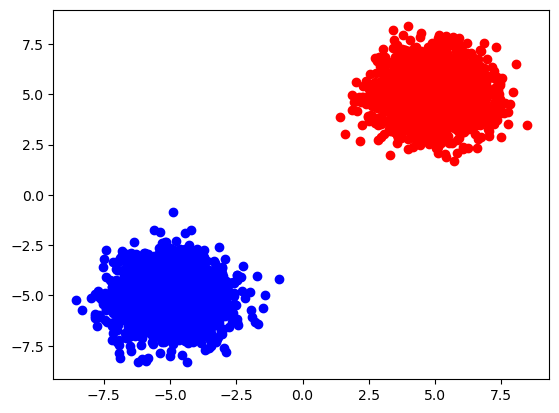

In [28]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')


In [31]:
from sklearn.metrics import r2_score
r2_score(y_means,y)

1.0